<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [16]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-12-15 19:57:08--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.3’

survey-data.csv.3   100%[===================>] 152.13M  33.6MB/s    in 4.5s    

2025-12-15 19:57:14 (34.2 MB/s) - ‘survey-data.csv.3’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [17]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [18]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [19]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [20]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)"


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [21]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [22]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [23]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [24]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


'survery-data.csv' loaded!
Describe the column:
 count     3.374000e+04
mean     2.963841e+145
std      5.444117e+147
min       0.000000e+00
25%       6.000000e+04
50%       1.100000e+05
75%       2.500000e+05
max      1.000000e+150
Name: CompTotal, dtype: float64 

Max value after dropping extreme values: 1000000.0

 Description of the cleaned column: 
 count      29968.000000
mean      161959.149326
std       193103.569216
min            0.000000
25%        54000.000000
50%        95000.000000
75%       175000.000000
max      1000000.000000
Name: CompTotal, dtype: float64


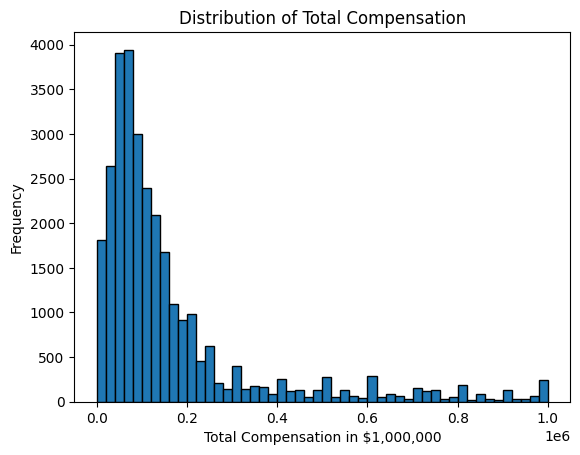

In [27]:
## Write your code here
df = pd.read_csv('survey-data.csv')
print("'survery-data.csv' loaded!")

print("Describe the column:\n", df['CompTotal'].describe(), "\n")

## Convert to numeric values
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

## Drop extreme values (over $1,000,000)
df_clean = df[df['CompTotal'] <= 1000000]

print("Max value after dropping extreme values:", df_clean['CompTotal'].max())
print("\n", "Description of the cleaned column:", "\n", df_clean['CompTotal'].describe())

plt.hist(df_clean['CompTotal'].dropna(), bins=50, edgecolor='black')
plt.xlabel('Total Compensation in $1,000,000')
plt.ylabel('Frequency')
plt.title('Distribution of Total Compensation')
plt.show()

**Box Plots**

Plot a box plot of Age.


Original Age column Description 
 count               65437
unique                  8
top       25-34 years old
freq                23911
Name: Age, dtype: object

 Age_numeric column description: 
 count    61775.000000
mean        33.252602
std         10.226150
min         21.000000
25%         29.500000
50%         29.500000
75%         39.500000
max         59.500000
Name: Age_numeric, dtype: float64

 Check for outliers in the new age_numeric column with max/max: 59.5 21.0 



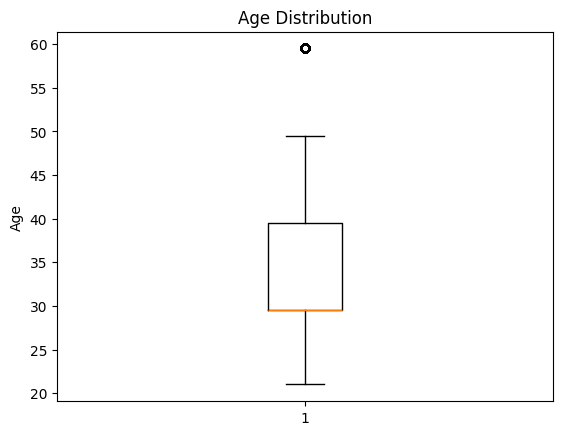

In [28]:
## Write your code here
print("Original Age column Description", "\n", df['Age'].describe())
## Age is mapped from earlier operations, so we must make it numeric

df['Age_numeric'] = df['Age'].str.extract(r'(\d+)-(\d+)').astype(float).mean(axis=1)
print("\n", "Age_numeric column description:", "\n", df['Age_numeric'].describe())

## Now that we made a numeric Age_numeric column, we should look for any outliers
print("\n", "Check for outliers in the new age_numeric column with max/max:", (df['Age_numeric'].max()), (df['Age_numeric'].min()), "\n")

## No outliers, so we can plot a box plot
plt.boxplot(df['Age_numeric'].dropna())
plt.ylabel("Age")
plt.title("Age Distribution")
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


Description of WorkExp colummn: 
 count    29658.000000
mean        11.466957
std          9.168709
min          0.000000
25%          4.000000
50%          9.000000
75%         16.000000
max         50.000000
Name: WorkExp, dtype: float64 



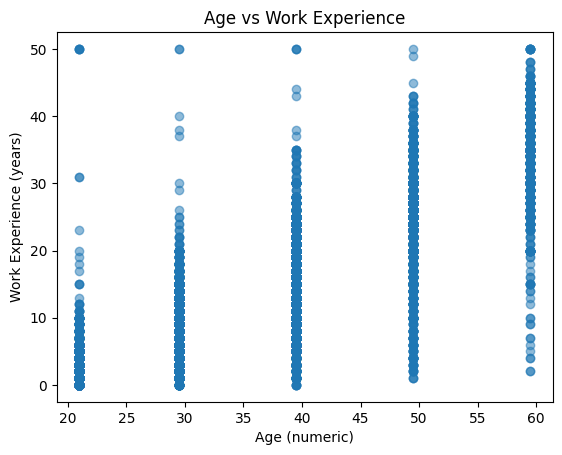

In [29]:
## Write your code here
## Check WorkExp for dtype
print("Description of WorkExp colummn:", "\n", df['WorkExp'].describe(), "\n")

plt.scatter(df['Age_numeric'], df['WorkExp'], alpha=0.5)
plt.xlabel('Age (numeric)')
plt.ylabel('Work Experience (years)')
plt.title('Age vs Work Experience')
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


count                   28911
unique                      5
top       30-60 minutes a day
freq                    10951
Name: TimeSearching, dtype: object

 count             28251
unique              954
top       None of these
freq               2364
Name: Frustration, dtype: object 


Numeric values are like: 
 [nan '30-60 minutes a day' '60-120 minutes a day' '15-30 minutes a day'
 'Less than 15 minutes a day' 'Over 120 minutes a day'] 


Numeric values are like: 
 [nan
 'Amount of technical debt;Number of software tools in use;Tracking my work;Showing my contributions'
 'Amount of technical debt;Complexity of tech stack for deployment'
 'Amount of technical debt;Complexity of tech stack for deployment;Complexity of tech stack for build;Maintaining security of code being produced'
 'Amount of technical debt;Tracking my work;Complexity of tech stack for build;Patching/updating core components;Maintaining security of systems/platforms used in work;Reliability of tools/systems used in

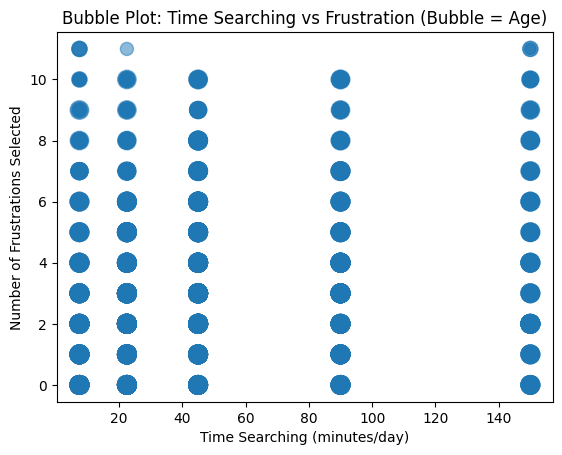

In [32]:
## Write your code here
## Find dtypes of TimeSearching and Frustration
print(df['TimeSearching'].describe())
print("\n", df['Frustration'].describe(), "\n\n")

## Both columns (TimeSearching and Frustration) are objects, so we must make them numeric columns
## Find what each column's values are like
print("Numeric values are like:", "\n", df['TimeSearching'].unique()[:20], "\n\n")
print("Numeric values are like:", "\n", df['Frustration'].unique()[:20], "\n\n")
## Make both columns a mapped-numeric styled column
time_map = {
    "Less than 15 minutes a day": 7.5,
    "15-30 minutes a day": 22.5,
    "30-60 minutes a day": 45,
    "60-120 minutes a day": 90,
    "Over 120 minutes a day": 150
}
df['TimeSearching_numeric'] = df['TimeSearching'].map(time_map)

df['Frustration_numeric'] = df['Frustration'].apply(
    lambda x: 0 if pd.isna(x) or x == "None of these" else len(str(x).split(';'))
)

# Build bubble plot
plt.scatter(
    df['TimeSearching_numeric'],
    df['Frustration_numeric'],
    s=df['Age_numeric'] * 3,   # scale bubble size
    alpha=0.5
)

plt.xlabel("Time Searching (minutes/day)")
plt.ylabel("Number of Frustrations Selected")
plt.title("Bubble Plot: Time Searching vs Frustration (Bubble = Age)")
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


count          42558
unique          8478
top       PostgreSQL
freq            3738
Name: DatabaseWantToWorkWith, dtype: object 


True/False: Are there any 'None' in the column? 
 False 




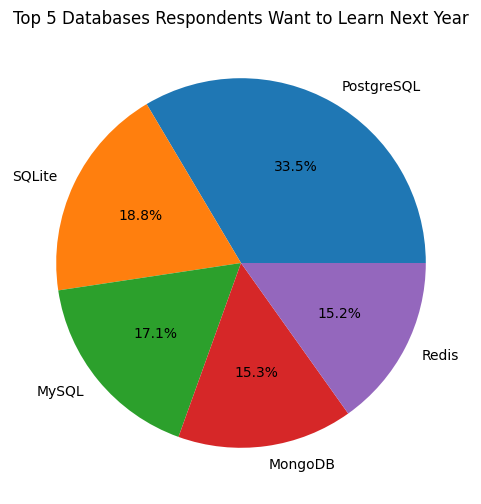

In [33]:
## Write your code here
## Describe DatabaseWantToWorkWith dtype
print(df['DatabaseWantToWorkWith'].describe(), "\n\n")

## Replace none with Nan
df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].replace([None, 'None'], pd.NA)
## Verify
print("True/False: Are there any 'None' in the column?", "\n", (df['DatabaseWantToWorkWith'] == None).any(), "\n\n")

## Split semicolon-separated values
df['Database_list'] = df['DatabaseWantToWorkWith'].str.split(';')

## Explode column
df_exploded = df.explode('Database_list')

## Drop missing values
df_exploded = df_exploded.dropna(subset=['Database_list'])

## Count the database frequency of each language
db_counts = df_exploded['Database_list'].value_counts()

## Select top 5 languages and plot the pie chart
top5 = db_counts.head(5)
top5.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Top 5 Databases Respondents Want to Learn Next Year")
plt.ylabel("")  # optional: removes the y-axis label
plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


TimeAnswering
15-30 minutes a day           9341
30-60 minutes a day           8642
Less than 15 minutes a day    5918
60-120 minutes a day          3704
Over 120 minutes a day        1239
Name: count, dtype: int64


 TimeSearching
30-60 minutes a day           10951
15-30 minutes a day            7805
60-120 minutes a day           5275
Less than 15 minutes a day     2689
Over 120 minutes a day         2191
Name: count, dtype: int64


 Age_numeric
29.5    23911
39.5    14942
21.0    14098
49.5     6249
59.5     2575
Name: count, dtype: int64


 Median for answering: 45.0


 Median for searching: 45.0


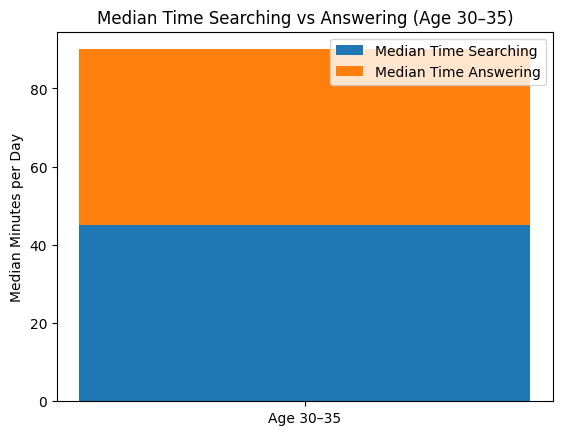

In [34]:
## Write your code here
## Show what the columns are like
print(df['TimeAnswering'].value_counts())
print("\n\n", df['TimeSearching'].value_counts())
print("\n\n", df['Age_numeric'].value_counts())

## Convert TimeAnswering into a mapped column just like TimeSearching
answer_map = {
    "Less than 15 minutes a day:": 7.5,
    "15-30 minutes a day": 22.5,
    "30-60 minutes a day": 45,
    "60-120 minutes a day": 90,
    "Over 120 minutes a day": 150
}
df['TimeAnswering_numeric'] = df['TimeAnswering'].map(answer_map)

## Create Age subset to create the stacked bar chart 
age_group = df[df['Age_numeric'] == 29.5]

## Compute median values for both TimeSearching and TimeAnswering
median_searching = age_group['TimeSearching_numeric'].median()
median_answering = age_group['TimeAnswering_numeric'].median()

## Ensure medians are calculated
print("\n\n", "Median for answering:", median_answering)
print("\n\n", "Median for searching:", median_searching)

## Create stacked bar chart
plt.bar(
    ['Age 30–35'],
    median_searching,
    label='Median Time Searching'
)

plt.bar(
    ['Age 30–35'],
    median_answering,
    bottom=median_searching,
    label='Median Time Answering'
)

plt.ylabel("Median Minutes per Day")
plt.title("Median Time Searching vs Answering (Age 30–35)")
plt.legend()
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


Age_numeric
49.5    130000.0
59.5    135000.0
Name: CompTotal, dtype: float64 




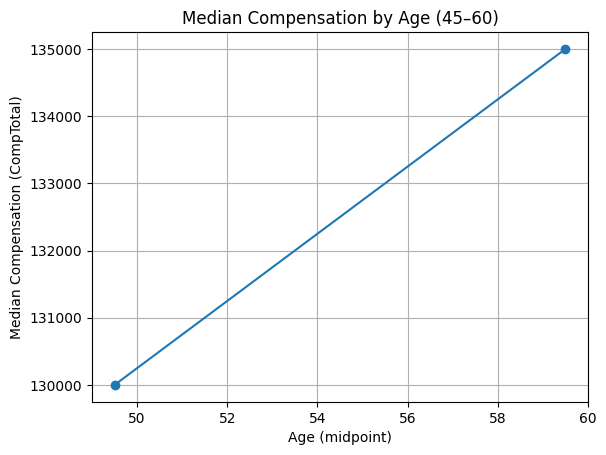

In [44]:
## Write your code here
## Filter Age Range to be between 45-60
age_range = df[(df['Age_numeric'] >= 45) & (df['Age_numeric'] <= 60)]

## Group median by age range
median_by_age = age_range.groupby('Age_numeric')['CompTotal'].median()

## Check output
print(median_by_age, "\n\n")

plt.plot(median_by_age.index, median_by_age.values, marker='o')
plt.xlabel("Age (midpoint)")
plt.ylabel("Median Compensation (CompTotal)")
plt.title("Median Compensation by Age (45–60)")
plt.grid(True)
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


MainBranch
I am a developer by profession                                                           50207
I am not primarily a developer, but I write code sometimes as part of my work/studies     6511
I am learning to code                                                                     3875
I code primarily as a hobby                                                               3334
I used to be a developer by profession, but no longer am                                  1510
Name: count, dtype: int64 




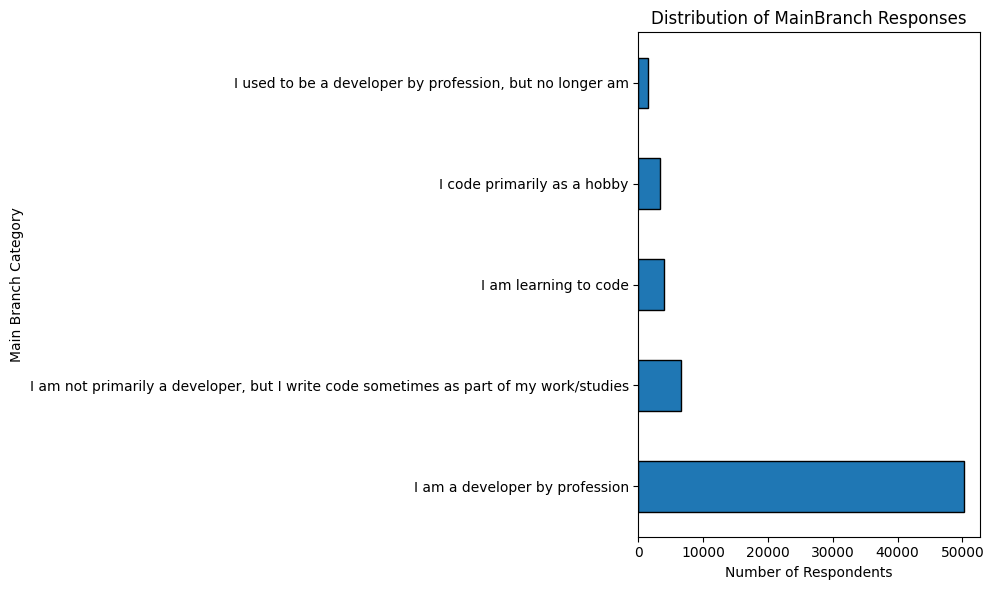

In [48]:
## Write your code here
## Check dtype and value_counts
print(df['MainBranch'].value_counts(), "\n\n")

## place value_counts into an object to plot later
branch_counts = df['MainBranch'].value_counts()

plt.figure(figsize=(10, 6))
branch_counts.plot(kind='barh', edgecolor='black')
plt.xlabel("Number of Respondents")
plt.ylabel("Main Branch Category")
plt.title("Distribution of MainBranch Responses")
plt.tight_layout()
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [51]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
